In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_v2.csv')

df2 = pd.get_dummies(df["Gender"])
df["GenderNumeric"] = df2["Male"]
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GenderNumeric
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,...,3,1,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,...,4,4,10,3,3,10,7,1,7,1
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,...,3,2,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,...,3,3,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,...,3,4,6,3,3,2,2,2,2,1


In [4]:
corr = df.corr()
corr

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GenderNumeric
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.036311
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.001851
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.016547
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.000508
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.017960
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.039403
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,0.033252
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.031858
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.014095,0.052733,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319,-0.039147
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.029071,-0.021222,0.002297,-0.017120,-0.014095,1.000000,-0.031351,0.006744,-0.015579,0.002572,0.003435,0.034986,0.017896,0.022827,-0.013859


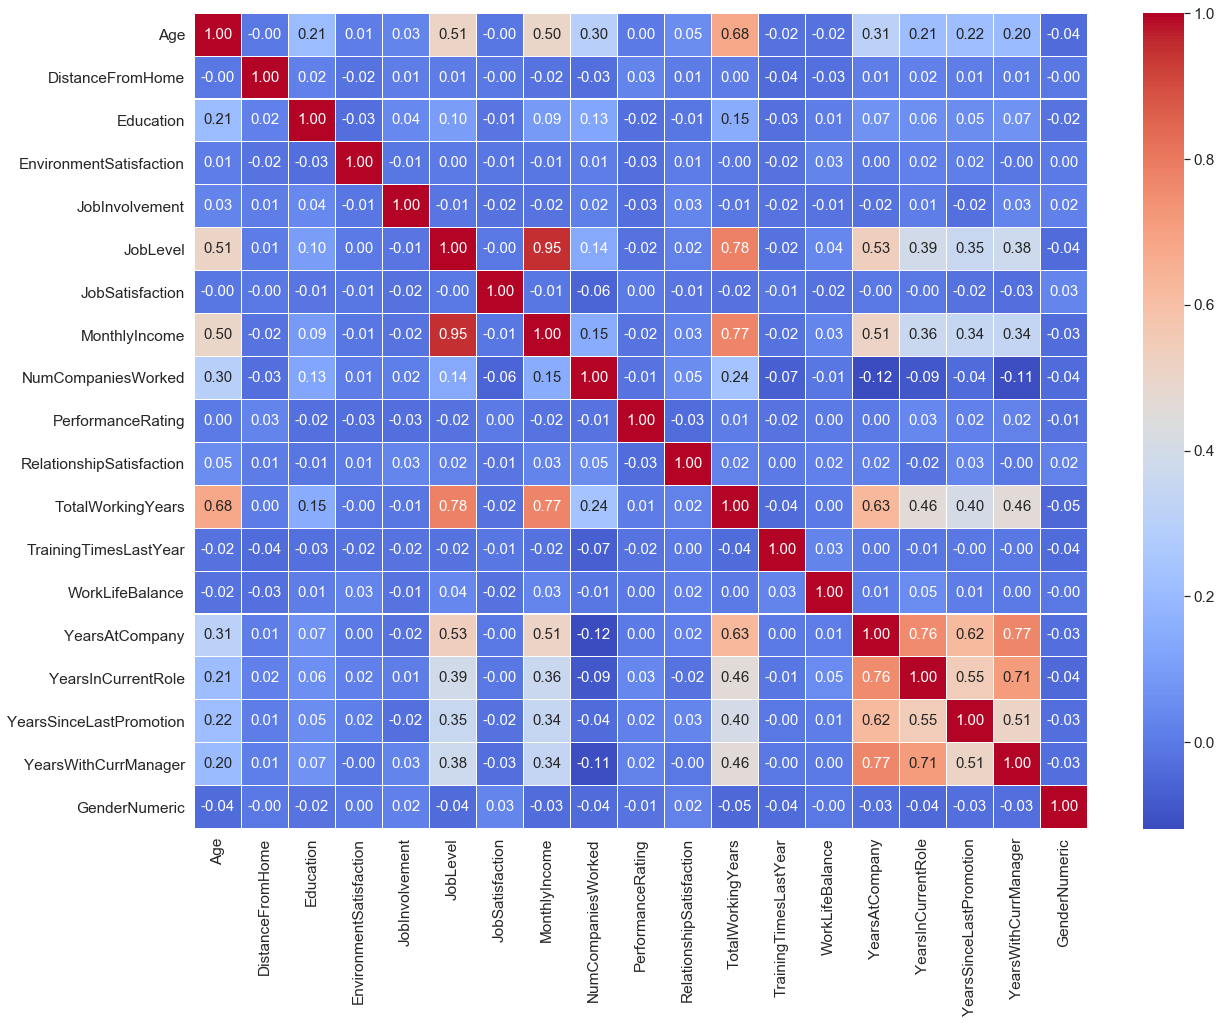

In [5]:
sns.set(font_scale=1.4)
fig, (ax) = plt.subplots(figsize=(20,15))
matrix = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True,
                 fmt='.2f',
                 annot_kws={"size": 15},
                 linewidths=.05)